In [1]:
import csv 
import pandas as pd
import nltk
import os
import warnings
warnings.filterwarnings('ignore')

Now we want to preprocess the tweets accordingly to their languages.

In [199]:
#define the languages we want to preprocess
lang_list = ['en', 'es', 'pt']

# define what each iso-639 code means
lang_dict = {
    'en': 'english',
    'es': 'spanish',
    'pt': 'portugese'
}

clean_data_dir = './clean_data'
joblib_dir = './joblib'
csv_dir = './processed_csv'
lang = 'en'

We will preprocess English first. Let's import the csv file into a Pandas DataFrame

In [3]:
fulldir = os.path.join(clean_data_dir, lang + '.csv')   

df_eng = pd.read_csv(fulldir)
df_eng

,Unnamed: 0,clean_tweets,prediction,language,confidence
0,3,I felt my first flash of violence at some fool...,"('en', 0.9772645831108093)",en,0.977265
1,4,Ladies drink and get in free till,"('en', 0.6527988910675049)",en,0.652799
2,7,Watching Miranda On bbc mermhart u r HILARIOUS,"('en', 0.5819909572601318)",en,0.581991
3,9,Shopping Kohls httptcoIZkQHT,"('en', 0.5320528745651245)",en,0.532053
4,16,Dennycrowe all over twitter because you and yo...,"('en', 0.768022358417511)",en,0.768022
...,...,...,...,...,...
4307,10492,Another Cardigan Records Hopscotch Day Party i...,"('en', 0.920673131942749)",en,0.920673
4308,10493,Im at Hempstead Hair World in Elmont NY httpst...,"('en', 0.5241799354553223)",en,0.524180
4309,10494,Bachelorette Laurita Winery httpstcoBsIIFmdGz,"('en', 0.6609522104263306)",en,0.660952
4310,10496,This job might be a great fit for you Sr Infor...,"('en', 0.6981475949287415)",en,0.698148


Since we just want the `clean_tweets` we can just omit other columns.

In [4]:
df_eng_clean_tweets = df_eng[['clean_tweets']]
df_eng_clean_tweets

,clean_tweets
0,I felt my first flash of violence at some fool...
1,Ladies drink and get in free till
2,Watching Miranda On bbc mermhart u r HILARIOUS
3,Shopping Kohls httptcoIZkQHT
4,Dennycrowe all over twitter because you and yo...
...,...
4307,Another Cardigan Records Hopscotch Day Party i...
4308,Im at Hempstead Hair World in Elmont NY httpst...
4309,Bachelorette Laurita Winery httpstcoBsIIFmdGz
4310,This job might be a great fit for you Sr Infor...


Firstly, we want to lowercase everything.

In [5]:
df_eng_clean_tweets['lowercase'] = df_eng_clean_tweets['clean_tweets'].apply(lambda x: x.lower())
df_eng_clean_tweets

,clean_tweets,lowercase
0,I felt my first flash of violence at some fool...,i felt my first flash of violence at some fool...
1,Ladies drink and get in free till,ladies drink and get in free till
2,Watching Miranda On bbc mermhart u r HILARIOUS,watching miranda on bbc mermhart u r hilarious
3,Shopping Kohls httptcoIZkQHT,shopping kohls httptcoizkqht
4,Dennycrowe all over twitter because you and yo...,dennycrowe all over twitter because you and yo...
...,...,...
4307,Another Cardigan Records Hopscotch Day Party i...,another cardigan records hopscotch day party i...
4308,Im at Hempstead Hair World in Elmont NY httpst...,im at hempstead hair world in elmont ny httpst...
4309,Bachelorette Laurita Winery httpstcoBsIIFmdGz,bachelorette laurita winery httpstcobsiifmdgz
4310,This job might be a great fit for you Sr Infor...,this job might be a great fit for you sr infor...


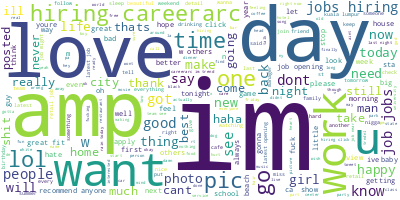

In [59]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_eng_clean_tweets['lowercase'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

A simple wordcloud to visualize which words are more common. The big im tells us that it is a stop words since it does not really have meanings, some words like cant, lol are not very useful either. We would want to add them in the stopwords.

Then we remove the stopwords.

In [63]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words(lang_dict[lang])
stop_words.append('cant')
stop_words.append('im')
stop_words.append('lol')


df_eng_clean_tweets['stopwords_removed'] = df_eng_clean_tweets['lowercase'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
df_eng_clean_tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_tweets,lowercase,stopwords_removed,lemmatized
0,I felt my first flash of violence at some fool...,i felt my first flash of violence at some fool...,felt first flash violence fool bumped pity fool,feel first flash violence fool bump pity fool
1,Ladies drink and get in free till,ladies drink and get in free till,ladies drink get free till,lady drink get free till
2,Watching Miranda On bbc mermhart u r HILARIOUS,watching miranda on bbc mermhart u r hilarious,watching miranda bbc mermhart u r hilarious,watch miranda bbc mermhart u r hilarious
3,Shopping Kohls httptcoIZkQHT,shopping kohls httptcoizkqht,shopping kohls httptcoizkqht,shopping kohls httptcoizkqht
4,Dennycrowe all over twitter because you and yo...,dennycrowe all over twitter because you and yo...,dennycrowe twitter friends stick,dennycrowe twitter friend ca nt stick
...,...,...,...,...
4307,Another Cardigan Records Hopscotch Day Party i...,another cardigan records hopscotch day party i...,another cardigan records hopscotch day party b...,another cardigan record hopscotch day party bo...
4308,Im at Hempstead Hair World in Elmont NY httpst...,im at hempstead hair world in elmont ny httpst...,hempstead hair world elmont ny httpstcohvyghzyehc,I m hempstead hair world elmont ny httpstcohvy...
4309,Bachelorette Laurita Winery httpstcoBsIIFmdGz,bachelorette laurita winery httpstcobsiifmdgz,bachelorette laurita winery httpstcobsiifmdgz,bachelorette laurita winery httpstcobsiifmdgz
4310,This job might be a great fit for you Sr Infor...,this job might be a great fit for you sr infor...,job might great fit sr information architect s...,job might great fit sr information architect s...


I will be using Lemmatizer instead of Stemmer because Stemmer could lead to mispelled words and this will cause duplicated tokens for a supposedly same word. However, I don't think this is scalable as we increase the scope of the languages as there might not be Lemmatizer / good Lemmatizers for specific languages. That introduces the need for language specific preprocessing.

Considerations:
1. Speed - while Lemmatizer is usually slower than Stemmer, it does a better job in getting the actual word / meaning of the tokens. So here is a tradeoff introduced.
2. Preprocess all the data source fairly - I want to create a pipeline to preprocess all languages the same way. For this assignment purpose, the SpaCy Lemmatizer used supports all three languages just fine. However, when it comes to scaling to other languages, we need to consider preprocessing each language differently.

In [7]:
# !python3 -m spacy download en_core_web_sm

2021-10-04 20:17:12.593489: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-04 20:17:12.593555: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
     |████████████████████████████████| 13.6 MB 10.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [64]:
# pip install spacy
import spacy

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
df_eng_clean_tweets['lemmatized'] = df_eng_clean_tweets['stopwords_removed'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))
df_eng_clean_tweets.sample(5)

,clean_tweets,lowercase,stopwords_removed,lemmatized
1898,I already went out and bought you a lamp,i already went out and bought you a lamp,already went bought lamp,already go buy lamp
2676,BBUKLive bbuk not impressed with CCB this year...,bbuklive bbuk not impressed with ccb this year...,bbuklive bbuk impressed ccb years seems like l...,bbuklive bbuk impressed ccb year seem like loa...
1173,OhSooTrill get like And go with me,ohsootrill get like and go with me,ohsootrill get like go,ohsootrill get like go
1514,Onions originate from the devil ok,onions originate from the devil ok,onions originate devil ok,onion originate devil ok
1612,Every female Is a model now thats so tired b,every female is a model now thats so tired b,every female model thats tired b,every female model that s tired b


After we lemmatized the tweets, we can now vectorize the tokens.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

n_features = 1000

# Use tf-idf features for NMF & SVD.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, max_features=n_features, stop_words='english', smooth_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df_eng_clean_tweets['lemmatized'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=5,  max_features=n_features, stop_words='english')
tf = tf_vectorizer.fit_transform(df_eng_clean_tweets['lemmatized'])
tf_feature_names = tf_vectorizer.get_feature_names()

print(tfidf.shape) # check shape of the document-term matrix

Extracting tf-idf features for NMF...
Extracting tf features for LDA...
(4312, 837)


Now we could use the decomposition library provided NMF and LatentDirichletAllocation

In [66]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [67]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [29]:
# !pip install pyLDAvis==3.3.1

  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 471 kB 22.2 MB/s 
     |████████████████████████████████| 24.1 MB 44.4 MB/s 
     |████████████████████████████████| 15.7 MB 35.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=0b5bcc40d4a23ec7c1cb92ac6edced1e897081eff54a2035922fe941a2d1a8e8
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=0dca57c25dbe4f0a4fef33304e88449711b4006ee03ca29849da64873fbc36fc
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn
  Attempting uninstall: numpy
    Found existin

In [101]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(df_eng_clean_tweets['lemmatized']))

In [102]:
# data_words

In [103]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1)]


In [164]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
grid_params = {'n_components' : list(range(4,10))}

# LDA model
sk_lda = LatentDirichletAllocation()
sk_lda_model = GridSearchCV(lda,param_grid=grid_params)
sk_lda_model.fit(tf)

# Estimators for LDA model
sk_lda_model1 = sk_lda_model.best_estimator_
print("Best LDA model's params" , sk_lda_model.best_params_)
print("Best log likelihood Score for the LDA model",sk_lda_model.best_score_)
print("LDA model Perplexity on train data", sk_lda_model1.perplexity(tf))

Best LDA model's params {'n_components': 4}
Best log likelihood Score for the LDA model -19684.49726071419
LDA model Perplexity on train data 601.1577740141136


In [165]:
sk_lda_model.best_estimator_.n_components

4

With a high perplexity, it seems like this model will be able to predict the topics very well.

In [166]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(sk_lda_model1, tf, tf_vectorizer,mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      269.562408 -124.803398       1        1  25.784595
0        1.782994 -295.079681       2        1  25.173536
3      220.811432 -343.832123       3        1  24.897027
1       50.533993  -76.050934       4        1  24.144841, topic_info=            Term        Freq       Total Category  logprob  loglift
362          job  384.000000  384.000000  Default  30.0000  30.0000
315         hire  219.000000  219.000000  Default  29.0000  29.0000
492           nt  198.000000  198.000000  Default  28.0000  28.0000
416         love  122.000000  122.000000  Default  27.0000  27.0000
108    careerarc  105.000000  105.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
716  temperature   18.926393   23.565613   Topic4  -5.1115   1.2019
731         time   33.899157   87.484884   Topic4  -4.5287   0.4730
175          day   38.952482  133.855018   Topic4  -4.3897   0.1867
797          way   21.535583   34.365531   Topic4  -4.9824   0.9538
793         want   27.089727  118.992556   Topic4  -4.7529  -0.0588

[201 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
9         3  0.970685       ai
10        3  0.958622  airport
19        1  0.459993      amp
19        2  0.045999      amp
19        3  0.344994      amp
...     ...       ...      ...
810       4  0.973572     wind
814       3  0.975863       wo
818       2  0.995812     work
825       4  0.932871    wrong
829       3  0.975730     yeah

[229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

The Grid Search CV seems to have done a great job in find the optimal number of topics and LDA has produced 5 well separated topics from the looks of Intertopic Distance Map, since none of them are overlapping. 

Most of the topics are human-interpretable too. For example:
1. Topic 1: This topic seems like it's talking about dating, meeting people in general.
2. Topic 2: It's mostly about a job at company, hiring of the company and career related words.
3. Topic 4: Seems like it is about a great day some one had.

Topic 3 is uninterpretable, but it also shows that the data cleaning is not done as well as it could be. 



We can save this model in a pickle to be used later to distinguish the topics in the pipeline.

In [167]:
from joblib import dump
model_name = 'en' + '.joblib'
dump_dir = os.path.join(joblib_dir, model_name)   

if not os.path.exists(joblib_dir):
    os.mkdir(joblib_dir)

dump(lda_model1, dump_dir)

['./joblib/en.joblib']

However, I could not find a way to use sklearn's LDA to predict which topic it is supposed to be, so I had to use gensim library to train the model again. We can use sklearn model's number of topic. This is not scalable at all as you need to do manual hyperparameter tuning for gensim LDA.

In [168]:

import gensim
import logging # This allows for seeing if the model converges. A log file is created.
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=corpus,
                           num_topics=sk_lda_model.best_estimator_.n_components,
                           id2word=id2word,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
    lda_train.save('lda_train.model')

In [169]:
import pyLDAvis.sklearn
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

gensimvis.prepare(lda_train, corpus, id2word)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.123146  0.142489       1        1  31.399822
0      0.207172  0.050646       2        1  25.260821
3     -0.053070 -0.048645       3        1  22.616369
2     -0.030956 -0.144491       4        1  20.722989, topic_info=           Term        Freq       Total Category  logprob  loglift
579         job  313.000000  313.000000  Default  30.0000  30.0000
2509       hire  183.000000  183.000000  Default  29.0000  29.0000
90           nt  148.000000  148.000000  Default  28.0000  28.0000
84           do  114.000000  114.000000  Default  27.0000  27.0000
6733  careerarc   92.000000   92.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
215        time   14.542062   63.728197   Topic4  -6.0182   0.0963
837        hope   10.338287   26.367400   Topic4  -6.3594   0.6377
670       photo   11.866570   43.928077   Topic4  -6.2215   0.2651
561    birthday    9.311135   22.288440   Topic4  -6.4640   0.7011
300        week    8.821755   19.133761   Topic4  -6.5180   0.7997

[225 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4908      3  0.903620  accident
1261      2  0.971664   airport
7892      4  0.900850      alam
255       1  0.224707       amp
255       2  0.302867       amp
...     ...       ...       ...
252       3  0.050285      work
100       1  0.819357     would
100       3  0.175576     would
517       1  0.403415       you
517       4  0.593257       you

[272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

Gensim's distribution looks pretty similar to that of sklearn as the topics are almost 1-to-1 the same. We can safely assume that sklearn GridSearchCV can be used to tune the number of topics for Gensim. 

Now we can use Gensim LDA to predict which Tweet belongs to which topic.

In [189]:
from operator import itemgetter 

def get_topic(tweet):
    prob = lda_train[id2word.doc2bow(tweet.split())][0]
    return max(prob,key=itemgetter(1))[0]

df_eng_clean_tweets['topics'] = df_eng_clean_tweets['lemmatized'].apply(lambda x : get_topic(x))

In [193]:
df_eng_clean_tweets.sample(5)

,clean_tweets,lowercase,stopwords_removed,lemmatized,topics
928,BRICK Keith Morgan addressing the court I firs...,brick keith morgan addressing the court i firs...,brick keith morgan addressing court first want...,brick keith morgan address court first want sa...,3
2326,Thank u to this bunch of awesome raggae team f...,thank u to this bunch of awesome raggae team f...,thank u bunch awesome raggae team making cca f...,thank u bunch awesome raggae team make cca fai...,2
610,“KerrySkillern I just love and miss RachelDunn...,“kerryskillern i just love and miss racheldunn...,“kerryskillern love miss racheldunn ” know meant,""" kerryskillern love miss racheldunn "" know mean",1
2888,Best friend appreciation post 🦄 nnKitKat amp J...,best friend appreciation post 🦄 nnkitkat amp j...,best friend appreciation post 🦄 nnkitkat amp j...,good friend appreciation post 🦄 nnkitkat amp j...,3
1493,dancarroll you can talk,dancarroll you can talk,dancarroll talk,dancarroll talk,1


Since we are persisting Tweets, there are no point persisting each tweet as a file under a directory. Assuming we are using a relational database, we can persist the dataframe as a table with Tweet and Topic as the two columns.

In [201]:
df_export = df_eng_clean_tweets[['clean_tweets', 'topics']]

df_export.sample(5)

,clean_tweets,topics
1464,May Almight God save us bless our inheritance ...,3
1084,I wanna no wht turns yu on,1
1926,They have all been warned damn fuck bois,1
2550,Awesooooooome yolkstation kickstarter,2
77,You never miss something tilours gone,1


In [200]:
csv_name = lang + '_topics.csv'
csv_dir = './processed_csv'
save_dir = os.path.join(csv_dir, csv_name)   

if not os.path.exists(csv_dir):
    os.mkdir(csv_dir)

df_export.to_csv(save_dir)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58094a3e-3210-4fc9-81c0-d48b1a865e59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>